In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from functools import reduce

In [4]:
from pysal.model import spreg

### Loading variables files

In [6]:
# Crimes reported as logartithm of rates
crimes = pd.read_csv('Analysis_files\dcrl.csv')

In [7]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSOA21CD   1002 non-null   object 
 1   MSOA21NM   1002 non-null   object 
 2   Log10-tot  1002 non-null   float64
 3   Log10-VSO  1002 non-null   float64
 4   Log10-ASB  1002 non-null   float64
 5   Log10-Bur  1002 non-null   float64
dtypes: float64(4), object(2)
memory usage: 47.1+ KB


In [9]:
# Deprivation variables as rates (from total dwellings)
deprivation = pd.read_csv('Analysis_files\deprivation-rates.csv')

In [10]:
deprivation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA21CD        1002 non-null   object 
 1   %_not deprived  1002 non-null   float64
 2   %_deprived-1    1002 non-null   float64
 3   %_deprived-2    1002 non-null   float64
 4   %_deprived-3    1002 non-null   float64
 5   %_deprived-4    1002 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.1+ KB


In [11]:
# average house price per square metre on each MSOA, and its logarithm
hpsm = pd.read_csv('Analysis_files\hpsm.csv')

In [12]:
hpsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msoa21cd     1002 non-null   object 
 1   price        1002 non-null   float64
 2   Log10-price  1002 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [13]:
hpsm.rename(columns={'msoa21cd':'MSOA21CD'}, inplace= True)

In [19]:
# tenure rates (from total dwellings)
tenure = pd.read_csv('Analysis_files/tenure-rates.csv')

In [20]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSOA21CD          1002 non-null   object 
 1   %_Owned-Outright  1002 non-null   float64
 2   %_Own-mortgage    1002 non-null   float64
 3   %_Own-Share       1002 non-null   float64
 4   %_Social-rent     1002 non-null   float64
 5   %_Private-rent    1002 non-null   float64
 6   %_Rent-free       1002 non-null   float64
 7   Empty %           1002 non-null   float64
dtypes: float64(7), object(1)
memory usage: 62.8+ KB


# Correlations Crime and each variable

## Correlations crimes - deprivation

In [21]:
dc01 = crimes.merge(deprivation, on= 'MSOA21CD')

In [22]:
dc01.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,40.106514,21.125222,4.738495,1.024170,0.109245
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,32.328024,36.767198,20.772619,6.574043,0.813284
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,40.111895,35.684748,16.224763,3.527122,0.048650
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415,42.462312,34.715243,15.284757,4.103853,0.125628
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318,40.965773,33.218360,16.449987,5.332980,0.344919


In [23]:
dc01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA21CD        1002 non-null   object 
 1   MSOA21NM        1002 non-null   object 
 2   Log10-tot       1002 non-null   float64
 3   Log10-VSO       1002 non-null   float64
 4   Log10-ASB       1002 non-null   float64
 5   Log10-Bur       1002 non-null   float64
 6   %_not deprived  1002 non-null   float64
 7   %_deprived-1    1002 non-null   float64
 8   %_deprived-2    1002 non-null   float64
 9   %_deprived-3    1002 non-null   float64
 10  %_deprived-4    1002 non-null   float64
dtypes: float64(9), object(2)
memory usage: 86.2+ KB


In [24]:
dc01_num = dc01.select_dtypes(include= ['float64'])

In [25]:
corr01 = dc01_num.corr()

In [26]:
corr01

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4
Log10-tot,1.000000,0.895725,0.927252,0.682258,-0.446563,-0.196270,0.159415,0.331338,0.386190
Log10-VSO,0.895725,1.000000,0.799638,0.565277,-0.592378,0.059585,0.391488,0.487281,0.437939
Log10-ASB,0.927252,0.799638,1.000000,0.619031,-0.460174,-0.182713,0.186775,0.374452,0.432933
Log10-Bur,0.682258,0.565277,0.619031,1.000000,-0.233480,-0.124592,0.113639,0.251473,0.320419
%_not deprived,-0.446563,-0.592378,-0.460174,-0.233480,1.000000,-0.550622,-0.846150,-0.835211,-0.635135
%_deprived-1,-0.196270,0.059585,-0.182713,-0.124592,-0.550622,1.000000,0.778434,0.503194,0.235713
%_deprived-2,0.159415,0.391488,0.186775,0.113639,-0.846150,0.778434,1.000000,0.881766,0.565681
%_deprived-3,0.331338,0.487281,0.374452,0.251473,-0.835211,0.503194,0.881766,1.000000,0.700019
%_deprived-4,0.386190,0.437939,0.432933,0.320419,-0.635135,0.235713,0.565681,0.700019,1.000000


<Axes: >

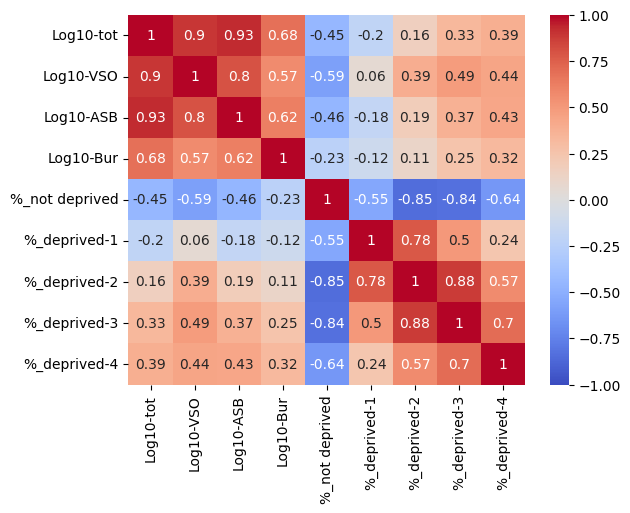

In [27]:
sns.heatmap(corr01, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

Deprivation variables are not strongly correlated with the chosen crime variables. But the correlation increases from negative for the % of not deprived households, to positive for the % of households with 4 dimensions of deprivation. From the crime types, the violence and sexual offences crime rates show the strongest correlations, and the burglaries show the weakest coefficients of correlations.

### OLS (m1, m2, m3, m4)

In [28]:
dc01.columns.values

array(['MSOA21CD', 'MSOA21NM', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', '%_not deprived', '%_deprived-1', '%_deprived-2',
       '%_deprived-3', '%_deprived-4'], dtype=object)

In [29]:
# Independent variables for regression 

vars01 = ['%_not deprived', '%_deprived-1', '%_deprived-2', '%_deprived-3', '%_deprived-4']

In [30]:
# Fit OLS model for total crime as target
m1 = spreg.OLS(
    # Dependent variable
    dc01[["Log10-tot"]].values,
    # Independent variables
    dc01[vars01].values,
    # Dependent variable name
    name_y="Log10-tot",
    # Independent variable name
    name_x=vars01)

In [31]:
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :           6
S.D. dependent var  :      0.2096                Degrees of Freedom    :         996
R-squared           :      0.4860
Adjusted R-squared  :      0.4834
Sum squared residual:     22.5954                F-statistic           :    188.3524
Sigma-square        :       0.023                Prob(F-statistic)     :  3.256e-141
S.E. of regression  :       0.151                Log likelihood        :     478.020
Sigma-square ML     :       0.023                Akaike info criterion :    -944.040
S.E of regression ML:      0.1502                Schwarz criterion     :    -914.581

------------------------------------------------------------

In [32]:
# Set up table of regression coefficients
def tablecoef(regression):
    return pd.DataFrame({
        # Pull out regression coefficients and
        # flatten as they are returned as Nx1 array
        "Coeff.": regression.betas.flatten(),
        # Pull out and flatten standard errors
        "Std. Error": regression.std_err.flatten(),
        # Pull out P-values from t-stat object
        "P-Value": [round(i[1], 5) for i in regression.t_stat],},
        index=regression.name_x,)

In [33]:
table1 = tablecoef(m1)
table1

,Coeff.,Std. Error,P-Value
CONSTANT,3.838669,0.082014,0.00000
%_not deprived,-0.020512,0.001136,0.00000
%_deprived-1,-0.026339,0.002286,0.00000
%_deprived-2,-0.009238,0.004461,0.03864
%_deprived-3,0.000563,0.007202,0.93776
%_deprived-4,0.066560,0.028787,0.02097


In [34]:
# Fit OLS model for violence and sexual crimes as target

m2 = spreg.OLS(dc01[["Log10-VSO"]].values, dc01[vars01].values,
               name_y="Log10-VSO", name_x=vars01)

In [35]:
print(m2.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-VSO                Number of Observations:        1002
Mean dependent var  :      1.3881                Number of Variables   :           6
S.D. dependent var  :      0.1909                Degrees of Freedom    :         996
R-squared           :      0.4540
Adjusted R-squared  :      0.4513
Sum squared residual:     19.9132                F-statistic           :    165.6303
Sigma-square        :       0.020                Prob(F-statistic)     :  3.434e-128
S.E. of regression  :       0.141                Log likelihood        :     541.327
Sigma-square ML     :       0.020                Akaike info criterion :   -1070.654
S.E of regression ML:      0.1410                Schwarz criterion     :   -1041.196

------------------------------------------------------------

In [36]:
table2 = tablecoef(m2)
table2

,Coeff.,Std. Error,P-Value
CONSTANT,2.644593,0.076993,0.00000
%_not deprived,-0.016629,0.001067,0.00000
%_deprived-1,-0.018486,0.002146,0.00000
%_deprived-2,0.003875,0.004188,0.35501
%_deprived-3,-0.003121,0.006761,0.64445
%_deprived-4,0.023065,0.027025,0.39359


In [37]:
# OLS model for anti-social behaviour crimes as target

m3 = spreg.OLS(dc01[["Log10-ASB"]].values, dc01[vars01].values,
               name_y="Log10-ASB", name_x=vars01)

In [38]:
print(m3.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-ASB                Number of Observations:        1002
Mean dependent var  :      1.4755                Number of Variables   :           6
S.D. dependent var  :      0.2241                Degrees of Freedom    :         996
R-squared           :      0.4964
Adjusted R-squared  :      0.4938
Sum squared residual:      25.309                F-statistic           :    196.3292
Sigma-square        :       0.025                Prob(F-statistic)     :  1.318e-145
S.E. of regression  :       0.159                Log likelihood        :     421.199
Sigma-square ML     :       0.025                Akaike info criterion :    -830.399
S.E of regression ML:      0.1589                Schwarz criterion     :    -800.940

------------------------------------------------------------

In [39]:
table3 = tablecoef(m3)
table3

,Coeff.,Std. Error,P-Value
CONSTANT,3.253175,0.086799,0.00000
%_not deprived,-0.019914,0.001203,0.00000
%_deprived-1,-0.026690,0.002419,0.00000
%_deprived-2,-0.012080,0.004722,0.01066
%_deprived-3,0.012309,0.007623,0.10666
%_deprived-4,0.110601,0.030467,0.00030


In [40]:
# OLS model for burglaries as target

m4 = spreg.OLS(dc01[["Log10-Bur"]].values, dc01[vars01].values, 
               name_y="Log10-Bur", name_x=vars01)

In [41]:
print(m4.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-Bur                Number of Observations:        1002
Mean dependent var  :      1.1021                Number of Variables   :           6
S.D. dependent var  :      0.1854                Degrees of Freedom    :         996
R-squared           :      0.1808
Adjusted R-squared  :      0.1767
Sum squared residual:     28.1998                F-statistic           :     43.9560
Sigma-square        :       0.028                Prob(F-statistic)     :   4.907e-41
S.E. of regression  :       0.168                Log likelihood        :     367.013
Sigma-square ML     :       0.028                Akaike info criterion :    -722.026
S.E of regression ML:      0.1678                Schwarz criterion     :    -692.567

------------------------------------------------------------

In [42]:
# Table of regression coefficients
table4 = tablecoef(m4)
table4

,Coeff.,Std. Error,P-Value
CONSTANT,1.641961,0.091623,0.00000
%_not deprived,-0.004498,0.001270,0.00041
%_deprived-1,-0.013188,0.002554,0.00000
%_deprived-2,-0.003870,0.004984,0.43764
%_deprived-3,0.017080,0.008046,0.03402
%_deprived-4,0.141466,0.032160,0.00001


## Correlations crimes - house price m2

In [43]:
dc02 = crimes.merge(hpsm, on= 'MSOA21CD')

In [44]:
dc02.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,price,Log10-price
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,12352.387268,4.091751
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,4365.344091,3.640018
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,4331.949819,3.636683
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415,4696.123760,3.671740
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318,4572.280104,3.660133


In [45]:
dc02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSOA21CD     1002 non-null   object 
 1   MSOA21NM     1002 non-null   object 
 2   Log10-tot    1002 non-null   float64
 3   Log10-VSO    1002 non-null   float64
 4   Log10-ASB    1002 non-null   float64
 5   Log10-Bur    1002 non-null   float64
 6   price        1002 non-null   float64
 7   Log10-price  1002 non-null   float64
dtypes: float64(6), object(2)
memory usage: 62.8+ KB


In [46]:
dc02_num = dc02.select_dtypes(include= ['float64'])

In [47]:
corr02 = dc02_num.corr()
corr02

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,price,Log10-price
Log10-tot,1.000000,0.895725,0.927252,0.682258,0.401764,0.362594
Log10-VSO,0.895725,1.000000,0.799638,0.565277,0.138376,0.085371
Log10-ASB,0.927252,0.799638,1.000000,0.619031,0.401369,0.386267
Log10-Bur,0.682258,0.565277,0.619031,1.000000,0.264026,0.279566
price,0.401764,0.138376,0.401369,0.264026,1.000000,0.971596
Log10-price,0.362594,0.085371,0.386267,0.279566,0.971596,1.000000


<Axes: >

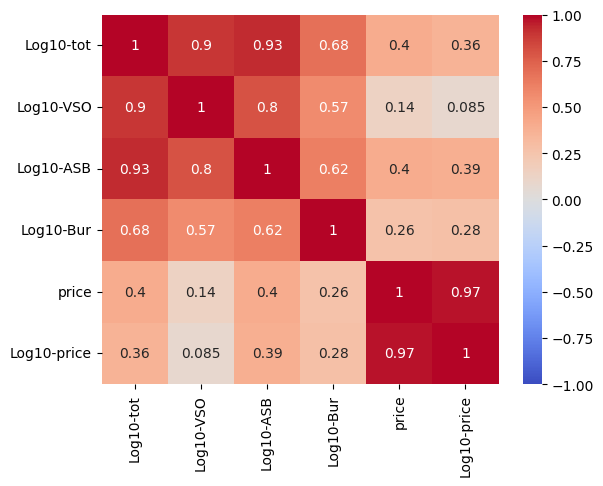

In [48]:
sns.heatmap(corr02, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

There are no strong correlations between the crime types chosen and the average house price per squared metre, or its logarithm. The anti-social behaviour crimes show the strongest positive correlation with price (similar to total crime), and the violence and sexual offences show the weakest correlation (very close to 0).

## Correlations crimes - tenure 1

In [49]:
dc03 = crimes.merge(tenure, on= 'MSOA21CD')

In [50]:
dc03.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_Owned-Outright,%_Own-mortgage,%_Own-Share,%_Social-rent,%_Private-rent,%_Rent-free,Empty %
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,15.212345,9.285812,0.163867,9.968592,32.404752,0.068278,32.896354
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,17.180617,24.703490,0.338868,40.630295,14.130803,0.271095,2.744832
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,22.914133,30.260277,0.583800,12.697640,29.117003,0.024325,4.402822
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415,27.177554,37.437186,0.670017,15.619765,15.745394,0.041876,3.308208
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318,15.441762,34.491908,1.247015,24.197400,20.668612,0.212258,3.741045


In [51]:
dc03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSOA21CD          1002 non-null   object 
 1   MSOA21NM          1002 non-null   object 
 2   Log10-tot         1002 non-null   float64
 3   Log10-VSO         1002 non-null   float64
 4   Log10-ASB         1002 non-null   float64
 5   Log10-Bur         1002 non-null   float64
 6   %_Owned-Outright  1002 non-null   float64
 7   %_Own-mortgage    1002 non-null   float64
 8   %_Own-Share       1002 non-null   float64
 9   %_Social-rent     1002 non-null   float64
 10  %_Private-rent    1002 non-null   float64
 11  %_Rent-free       1002 non-null   float64
 12  Empty %           1002 non-null   float64
dtypes: float64(11), object(2)
memory usage: 101.9+ KB


In [52]:
dc03_num = dc03.select_dtypes(include= ['float64'])

In [53]:
corr03 = dc03_num.corr()

<Axes: >

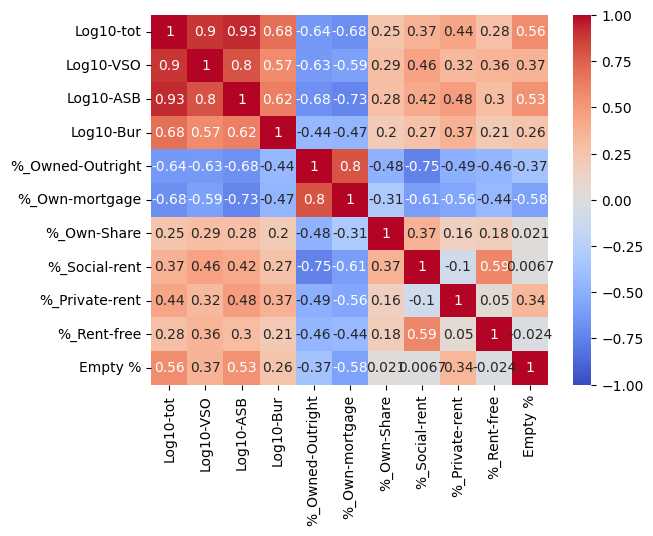

In [54]:
sns.heatmap(corr03, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

- Crimes and % of households living in owned dwellings (with of without mortgage) have a considerable negative correlation. This correlations are stronger than the positive ones. The rest of tenure variables show a positive correlation with the crimes variables. The strongest one is the % of empty dwellings with total crimes and anti-social behaviour crimes. 
- Considering only positive correlations:
Total crimes correlations: following the % of empty dwellings, the highest is the % of households living in private rent.
Violence and sexual offences correlations: the strongest is with the % of households living in social rented dwellings, though the coefficients are not much higher than the rest.
Anti-social behaviour crimes: similar to total crimes coefficients, only here they are slightly higher.
Burglaries correlations: the highest is with % private rented dwellings.
- % of households living in partially owned dwellings has the weakest correlations with crime variables.

### OLS x

In [55]:
dc03.columns.values

array(['MSOA21CD', 'MSOA21NM', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', '%_Owned-Outright', '%_Own-mortgage', '%_Own-Share',
       '%_Social-rent', '%_Private-rent', '%_Rent-free', 'Empty %'],
      dtype=object)

In [56]:
# Independent variables for regression 

vars03 = ['%_Owned-Outright', '%_Own-mortgage', '%_Own-Share', '%_Social-rent', '%_Private-rent', '%_Rent-free', 'Empty %']

In [57]:
# Fit OLS model for total crime as target
m5 = spreg.OLS(
    # Dependent variable
    dc03[["Log10-tot"]].values,
    # Independent variables
    dc03[vars03].values,
    # Dependent variable name
    name_y="Log10-tot",
    # Independent variable name
    name_x=vars03)

In [58]:
print(m5.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :           8
S.D. dependent var  :      0.2096                Degrees of Freedom    :         994
R-squared           :   -101.9419
Adjusted R-squared  :   -102.6669
Sum squared residual:     4525.35                F-statistic           :    148.2793
Sigma-square        :       4.553                Prob(F-statistic)     :  1.457e-149
S.E. of regression  :       2.134                Log likelihood        :   -2177.133
Sigma-square ML     :       4.516                Akaike info criterion :    4370.266
S.E of regression ML:      2.1252                Schwarz criterion     :    4409.544

------------------------------------------------------------

Model is performing very bad. Multicollinearity condition number very high. Have to choose better variables

## Correlations crimes - tenure 2

In [60]:
tenure2 = pd.read_csv('Analysis_files/tenuregroups-rates.csv')

In [61]:
tenure2.head()

,MSOA21CD,%_Owned,%_Social-rent,%_Private-rent
0,E02000002,41.884107,40.630295,14.130803
1,E02000003,53.174410,12.697640,29.117003
2,E02000004,64.614740,15.619765,15.745394
3,E02000005,49.933669,24.197400,20.668612
4,E02000007,38.267053,40.874375,15.854622


In [62]:
dc04 = crimes.merge(tenure2, on= 'MSOA21CD')

In [63]:
dc04.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_Owned,%_Social-rent,%_Private-rent
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,24.498156,9.968592,32.404752
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,41.884107,40.630295,14.130803
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,53.174410,12.697640,29.117003
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415,64.614740,15.619765,15.745394
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318,49.933669,24.197400,20.668612


In [64]:
dc04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA21CD        1002 non-null   object 
 1   MSOA21NM        1002 non-null   object 
 2   Log10-tot       1002 non-null   float64
 3   Log10-VSO       1002 non-null   float64
 4   Log10-ASB       1002 non-null   float64
 5   Log10-Bur       1002 non-null   float64
 6   %_Owned         1002 non-null   float64
 7   %_Social-rent   1002 non-null   float64
 8   %_Private-rent  1002 non-null   float64
dtypes: float64(7), object(2)
memory usage: 70.6+ KB


In [65]:
dc04_num = dc04.select_dtypes(include= ['float64'])

In [66]:
corr04 = dc04_num.corr()

In [67]:
corr04

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_Owned,%_Social-rent,%_Private-rent
Log10-tot,1.000000,0.895725,0.927252,0.682258,-0.694594,0.372000,0.442854
Log10-VSO,0.895725,1.000000,0.799638,0.565277,-0.642344,0.460568,0.324283
Log10-ASB,0.927252,0.799638,1.000000,0.619031,-0.741052,0.415294,0.483069
Log10-Bur,0.682258,0.565277,0.619031,1.000000,-0.479559,0.266834,0.368272
%_Owned,-0.694594,-0.642344,-0.741052,-0.479559,1.000000,-0.718571,-0.553320
%_Social-rent,0.372000,0.460568,0.415294,0.266834,-0.718571,1.000000,-0.099747
%_Private-rent,0.442854,0.324283,0.483069,0.368272,-0.553320,-0.099747,1.000000


<Axes: >

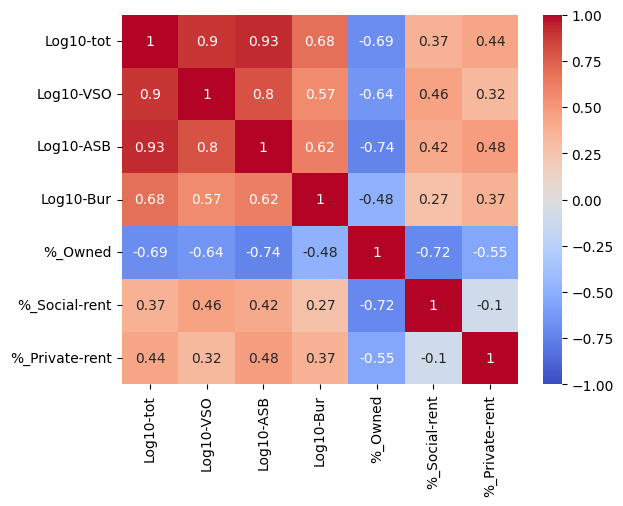

In [68]:
sns.heatmap(corr04, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

This heatmap is easier to read. 
- Percentage of households in owned dwellings is negatively correlated to all types of crime. ASB is the strongest and burglaries is the weakest correlation.
- Percentage of households in social rent is positively correlated with all types of crime although the correlation with burglaries is weak (0.27) and with VSO and ASB the correlation is moderate (0.46 & 0.42).
- Percentage of households in private rent is positively correlated with all types of crime again. The correlation with VSO is the weakest (0.32), followed by burglaries (0.37) and with ASB the correlation is moderate (0.48).

### OLS (m6, m7, m8, m9)

In [69]:
dc04.columns.values

array(['MSOA21CD', 'MSOA21NM', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', '%_Owned', '%_Social-rent', '%_Private-rent'],
      dtype=object)

In [70]:
# Independent variables for regression 

vars04 = ['%_Owned', '%_Social-rent', '%_Private-rent']

In [71]:
# OLS model for total crime as target

m6 = spreg.OLS(dc04[["Log10-tot"]].values, dc04[vars04].values,
               name_y="Log10-tot", name_x=vars04)

In [72]:
print(m6.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :           4
S.D. dependent var  :      0.2096                Degrees of Freedom    :         998
R-squared           :      0.5444
Adjusted R-squared  :      0.5431
Sum squared residual:     20.0265                F-statistic           :    397.5723
Sigma-square        :       0.020                Prob(F-statistic)     :  7.652e-170
S.E. of regression  :       0.142                Log likelihood        :     538.485
Sigma-square ML     :       0.020                Akaike info criterion :   -1068.971
S.E of regression ML:      0.1414                Schwarz criterion     :   -1049.332

------------------------------------------------------------

In [73]:
tablecoef(m6)

,Coeff.,Std. Error,P-Value
CONSTANT,3.149056,0.081061,0.0
%_Owned,-0.015645,0.000803,0.0
%_Social-rent,-0.010171,0.000910,0.0
%_Private-rent,-0.008740,0.001105,0.0


In [74]:
# OLS model for VSO crime as target

m7 = spreg.OLS(dc04[["Log10-VSO"]].values, dc04[vars04].values,
               name_y="Log10-VSO", name_x=vars04)

In [75]:
print(m7.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-VSO                Number of Observations:        1002
Mean dependent var  :      1.3881                Number of Variables   :           4
S.D. dependent var  :      0.1909                Degrees of Freedom    :         998
R-squared           :      0.4183
Adjusted R-squared  :      0.4165
Sum squared residual:     21.2157                F-statistic           :    239.2010
Sigma-square        :       0.021                Prob(F-statistic)     :  6.387e-117
S.E. of regression  :       0.146                Log likelihood        :     509.586
Sigma-square ML     :       0.021                Akaike info criterion :   -1011.171
S.E of regression ML:      0.1455                Schwarz criterion     :    -991.532

------------------------------------------------------------

In [76]:
tablecoef(m7)

,Coeff.,Std. Error,P-Value
CONSTANT,1.923262,0.083433,0.00000
%_Owned,-0.008905,0.000826,0.00000
%_Social-rent,-0.002537,0.000936,0.00686
%_Private-rent,-0.003547,0.001137,0.00186


In [77]:
# OLS model for ASB crime as target

m8 = spreg.OLS(dc04[["Log10-ASB"]].values, dc04[vars04].values,
               name_y="Log10-ASB", name_x=vars04)

In [78]:
print(m8.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-ASB                Number of Observations:        1002
Mean dependent var  :      1.4755                Number of Variables   :           4
S.D. dependent var  :      0.2241                Degrees of Freedom    :         998
R-squared           :      0.5899
Adjusted R-squared  :      0.5887
Sum squared residual:     20.6076                F-statistic           :    478.5674
Sigma-square        :       0.021                Prob(F-statistic)     :  1.277e-192
S.E. of regression  :       0.144                Log likelihood        :     524.155
Sigma-square ML     :       0.021                Akaike info criterion :   -1040.310
S.E of regression ML:      0.1434                Schwarz criterion     :   -1020.671

------------------------------------------------------------

In [79]:
tablecoef(m8)

,Coeff.,Std. Error,P-Value
CONSTANT,2.465583,0.082228,0.0
%_Owned,-0.015009,0.000814,0.0
%_Social-rent,-0.008281,0.000923,0.0
%_Private-rent,-0.006147,0.001121,0.0


In [80]:
# OLS model for burglaries as target

m9 = spreg.OLS(dc04[["Log10-Bur"]].values, dc04[vars04].values,
               name_y="Log10-Bur", name_x=vars04)

In [81]:
print(m9.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-Bur                Number of Observations:        1002
Mean dependent var  :      1.1021                Number of Variables   :           4
S.D. dependent var  :      0.1854                Degrees of Freedom    :         998
R-squared           :      0.2454
Adjusted R-squared  :      0.2431
Sum squared residual:     25.9762                F-statistic           :    108.1672
Sigma-square        :       0.026                Prob(F-statistic)     :   1.223e-60
S.E. of regression  :       0.161                Log likelihood        :     408.162
Sigma-square ML     :       0.026                Akaike info criterion :    -808.323
S.E of regression ML:      0.1610                Schwarz criterion     :    -788.684

------------------------------------------------------------

In [82]:
tablecoef(m9)

,Coeff.,Std. Error,P-Value
CONSTANT,1.230625,0.092320,0.00000
%_Owned,-0.004292,0.000914,0.00000
%_Social-rent,-0.000421,0.001036,0.68433
%_Private-rent,0.002459,0.001258,0.05088


## Correlations Empty dwellings and crime

In [84]:
vacant = pd.read_csv('Analysis_files/vacants.csv')

In [85]:
vacant.head(3)

,MSOA21CD,Empty %
0,E02000002,2.744832
1,E02000003,4.402822
2,E02000004,3.308208


In [86]:
dc05 = crimes.merge(vacant, on= 'MSOA21CD')

In [87]:
dc05.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,Empty %
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,32.896354
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,2.744832
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,4.402822
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415,3.308208
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318,3.741045


In [88]:
dc05_num = dc05.select_dtypes(include= ['float64'])

In [89]:
corr05 = dc05_num.corr()
corr05

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,Empty %
Log10-tot,1.000000,0.895725,0.927252,0.682258,0.557766
Log10-VSO,0.895725,1.000000,0.799638,0.565277,0.365773
Log10-ASB,0.927252,0.799638,1.000000,0.619031,0.532148
Log10-Bur,0.682258,0.565277,0.619031,1.000000,0.255424
Empty %,0.557766,0.365773,0.532148,0.255424,1.000000


<Axes: >

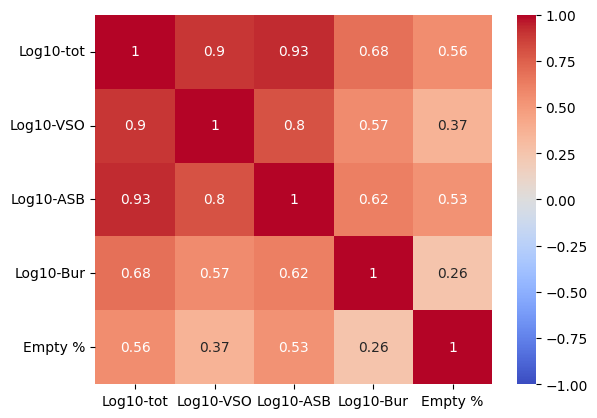

In [90]:
sns.heatmap(corr05, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

The correlation between the percentage of empty dwellings and total crimes and ASB is moderate. 
The correlation between the percentage of empty dwellings and VSO crimes and burglaries is weak.

## Correlations accommodation types and crime

In [93]:
datp = pd.read_csv('Analysis_files/accommodation-rates.csv')

In [94]:
datp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MSOA21CD  1002 non-null   object 
 1   %_Houses  1002 non-null   float64
 2   %_Flats   1002 non-null   float64
 3   %_Other   1002 non-null   float64
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [95]:
dc06 = crimes.merge(datp, on= 'MSOA21CD')

In [96]:
dc06.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_Houses,%_Flats,%_Other
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,1.365561,58.350403,7.387683
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,58.386987,37.241613,1.626567
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,64.558502,24.276332,6.738020
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415,83.040201,11.264657,2.386935
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318,82.647917,9.763863,3.847174


In [97]:
dc06_num = dc06.select_dtypes(include= ['float64'])

In [98]:
corr06 = dc06_num.corr()
corr06

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_Houses,%_Flats,%_Other
Log10-tot,1.000000,0.895725,0.927252,0.682258,-0.610786,0.483573,0.261975
Log10-VSO,0.895725,1.000000,0.799638,0.565277,-0.452973,0.411322,0.121262
Log10-ASB,0.927252,0.799638,1.000000,0.619031,-0.664012,0.549306,0.282646
Log10-Bur,0.682258,0.565277,0.619031,1.000000,-0.435106,0.336691,0.283621
%_Houses,-0.610786,-0.452973,-0.664012,-0.435106,1.000000,-0.864774,-0.473397
%_Flats,0.483573,0.411322,0.549306,0.336691,-0.864774,1.000000,0.021995
%_Other,0.261975,0.121262,0.282646,0.283621,-0.473397,0.021995,1.000000


<Axes: >

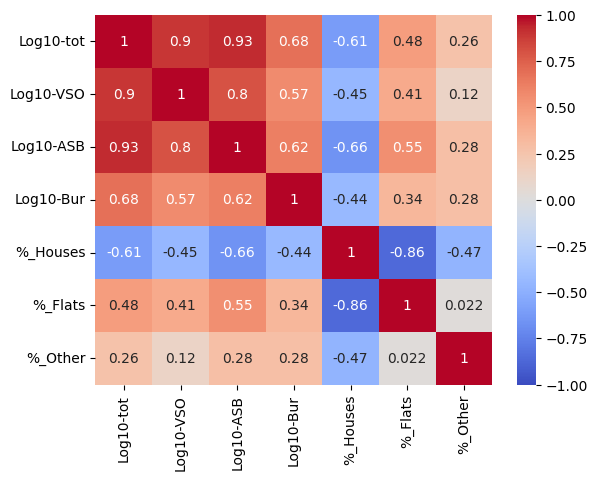

In [99]:
sns.heatmap(corr06, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

'% Houses' is negatively correlated to all types of crime. ASB is the strongest correlation. The others are moderate and similar. <br>
'% Flats' is  positively and moderately correlated with all types of crime. The strongest correlation is with ASB crimes (0.55), and the weakest is with burglaries (0.34). <br>
'% Other' type of properties is positively correlated with all types of crime. Although those correlations are quite weak. 

### OLS (m10, m11, m12, m13)

In [100]:
dc06.columns.values

array(['MSOA21CD', 'MSOA21NM', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', '%_Houses', '%_Flats', '%_Other'], dtype=object)

In [101]:
# Independent variables for regression 

vars06 = ['%_Houses', '%_Flats', '%_Other']

In [102]:
# OLS model for total crime as target

m10 = spreg.OLS(dc06[["Log10-tot"]].values, dc06[vars06].values,
                name_y="Log10-tot", name_x=vars06)

In [103]:
print(m10.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :           4
S.D. dependent var  :      0.2096                Degrees of Freedom    :         998
R-squared           :      0.4316
Adjusted R-squared  :      0.4299
Sum squared residual:     24.9856                F-statistic           :    252.6353
Sigma-square        :       0.025                Prob(F-statistic)     :  6.025e-122
S.E. of regression  :       0.158                Log likelihood        :     427.642
Sigma-square ML     :       0.025                Akaike info criterion :    -847.284
S.E of regression ML:      0.1579                Schwarz criterion     :    -827.645

------------------------------------------------------------

In [104]:
tablecoef(m10)

,Coeff.,Std. Error,P-Value
CONSTANT,3.174472,0.091563,0.0
%_Houses,-0.014248,0.000927,0.0
%_Flats,-0.010613,0.001055,0.0
%_Other,-0.010855,0.001151,0.0


In [105]:
# OLS model for VSO crime as target

m11 = spreg.OLS(dc06[["Log10-VSO"]].values, dc06[vars06].values,
                name_y="Log10-VSO",name_x=vars06)

In [106]:
print(m11.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-VSO                Number of Observations:        1002
Mean dependent var  :      1.3881                Number of Variables   :           4
S.D. dependent var  :      0.1909                Degrees of Freedom    :         998
R-squared           :      0.2287
Adjusted R-squared  :      0.2264
Sum squared residual:     28.1296                F-statistic           :     98.6425
Sigma-square        :       0.028                Prob(F-statistic)     :   6.398e-56
S.E. of regression  :       0.168                Log likelihood        :     368.262
Sigma-square ML     :       0.028                Akaike info criterion :    -728.524
S.E of regression ML:      0.1676                Schwarz criterion     :    -708.885

------------------------------------------------------------

In [107]:
tablecoef(m11)

,Coeff.,Std. Error,P-Value
CONSTANT,1.972832,0.097153,0.00000
%_Houses,-0.007662,0.000983,0.00000
%_Flats,-0.004472,0.001119,0.00007
%_Other,-0.006514,0.001221,0.00000


In [108]:
# OLS model for ASB crime as target

m12 = spreg.OLS(dc06[["Log10-ASB"]].values, dc06[vars06].values,
                name_y="Log10-ASB", name_x=vars06)

In [109]:
print(m12.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-ASB                Number of Observations:        1002
Mean dependent var  :      1.4755                Number of Variables   :           4
S.D. dependent var  :      0.2241                Degrees of Freedom    :         998
R-squared           :      0.4705
Adjusted R-squared  :      0.4689
Sum squared residual:     26.6113                F-statistic           :    295.5455
Sigma-square        :       0.027                Prob(F-statistic)     :  2.925e-137
S.E. of regression  :       0.163                Log likelihood        :     396.060
Sigma-square ML     :       0.027                Akaike info criterion :    -784.120
S.E of regression ML:      0.1630                Schwarz criterion     :    -764.481

------------------------------------------------------------

In [110]:
tablecoef(m12)

,Coeff.,Std. Error,P-Value
CONSTANT,2.440942,0.094495,0.0
%_Houses,-0.012831,0.000956,0.0
%_Flats,-0.007945,0.001089,0.0
%_Other,-0.008484,0.001188,0.0


In [111]:
# OLS model for Burglaries as target

m13 = spreg.OLS(dc06[["Log10-Bur"]].values, dc06[vars06].values,
                name_y="Log10-Bur", name_x=vars06)

In [112]:
print(m13.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-Bur                Number of Observations:        1002
Mean dependent var  :      1.1021                Number of Variables   :           4
S.D. dependent var  :      0.1854                Degrees of Freedom    :         998
R-squared           :      0.1971
Adjusted R-squared  :      0.1947
Sum squared residual:     27.6379                F-statistic           :     81.6638
Sigma-square        :       0.028                Prob(F-statistic)     :   3.003e-47
S.E. of regression  :       0.166                Log likelihood        :     377.097
Sigma-square ML     :       0.028                Akaike info criterion :    -746.195
S.E of regression ML:      0.1661                Schwarz criterion     :    -726.556

------------------------------------------------------------

In [113]:
tablecoef(m13)

,Coeff.,Std. Error,P-Value
CONSTANT,1.220176,0.096300,0.00000
%_Houses,-0.002957,0.000975,0.00248
%_Flats,-0.000131,0.001110,0.90604
%_Other,0.001690,0.001210,0.16283


## OLS with all variables (m14, m15, m16, m17)

In [114]:
dfps = [crimes, deprivation, tenure2, hpsm, vacant, datp]

In [115]:
dc07 = reduce(lambda  left,right: pd.merge(left,right,on=['MSOA21CD'],
                                            how='outer'), dfps)

In [116]:
dc07.drop(['price'], axis=1, inplace= True)

In [117]:
dc07.head(3)

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,%_Owned,%_Social-rent,%_Private-rent,Log10-price,Empty %,%_Houses,%_Flats,%_Other
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344,40.106514,21.125222,4.738495,1.024170,0.109245,24.498156,9.968592,32.404752,4.091751,32.896354,1.365561,58.350403,7.387683
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510,32.328024,36.767198,20.772619,6.574043,0.813284,41.884107,40.630295,14.130803,3.640018,2.744832,58.386987,37.241613,1.626567
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385,40.111895,35.684748,16.224763,3.527122,0.048650,53.174410,12.697640,29.117003,3.636683,4.402822,64.558502,24.276332,6.738020


In [118]:
dc07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA21CD        1002 non-null   object 
 1   MSOA21NM        1002 non-null   object 
 2   Log10-tot       1002 non-null   float64
 3   Log10-VSO       1002 non-null   float64
 4   Log10-ASB       1002 non-null   float64
 5   Log10-Bur       1002 non-null   float64
 6   %_not deprived  1002 non-null   float64
 7   %_deprived-1    1002 non-null   float64
 8   %_deprived-2    1002 non-null   float64
 9   %_deprived-3    1002 non-null   float64
 10  %_deprived-4    1002 non-null   float64
 11  %_Owned         1002 non-null   float64
 12  %_Social-rent   1002 non-null   float64
 13  %_Private-rent  1002 non-null   float64
 14  Log10-price     1002 non-null   float64
 15  Empty %         1002 non-null   float64
 16  %_Houses        1002 non-null   float64
 17  %_Flats         1002 non-null   f

In [119]:
dc07.columns.values

array(['MSOA21CD', 'MSOA21NM', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', '%_not deprived', '%_deprived-1', '%_deprived-2',
       '%_deprived-3', '%_deprived-4', '%_Owned', '%_Social-rent',
       '%_Private-rent', 'Log10-price', 'Empty %', '%_Houses', '%_Flats',
       '%_Other'], dtype=object)

In [120]:
# Independent variables for regression 

vars07 = ['%_not deprived', '%_deprived-1', '%_deprived-2', '%_deprived-3', '%_deprived-4', '%_Owned', 
          '%_Social-rent', '%_Private-rent', 'Log10-price', 'Empty %', '%_Houses', '%_Flats', '%_Other']

In [121]:
# OLS model for total crime as target

m14 = spreg.OLS(
    # Dependent variable
    dc07[["Log10-tot"]].values,
    # Independent variables
    dc07[vars07].values,
    # Dependent variable name
    name_y="Log10-tot",
    # Independent variable name
    name_x=vars07)

In [122]:
print(m14.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :          14
S.D. dependent var  :      0.2096                Degrees of Freedom    :         988
R-squared           :      0.5655
Adjusted R-squared  :      0.5598
Sum squared residual:     19.1005                F-statistic           :     98.9158
Sigma-square        :       0.019                Prob(F-statistic)     :  1.508e-168
S.E. of regression  :       0.139                Log likelihood        :     562.203
Sigma-square ML     :       0.019                Akaike info criterion :   -1096.406
S.E of regression ML:      0.1381                Schwarz criterion     :   -1027.669

------------------------------------------------------------

In [123]:
tablecoef(m14)

,Coeff.,Std. Error,P-Value
CONSTANT,-0.712767,9.520768,0.94034
%_not deprived,0.024006,0.102056,0.81408
%_deprived-1,0.021801,0.102123,0.83100
%_deprived-2,0.036754,0.102048,0.71880
%_deprived-3,0.015501,0.102505,0.87983
%_deprived-4,0.049330,0.104396,0.63665
%_Owned,-0.015065,0.004657,0.00126
%_Social-rent,-0.011134,0.004865,0.02231
%_Private-rent,-0.009531,0.004852,0.04977
Log10-price,-0.070735,0.070439,0.31553


In [124]:
# OLS model for VSO as target

m15 = spreg.OLS(dc07[["Log10-VSO"]].values, dc07[vars07].values, 
                name_y="Log10-VSO", name_x=vars07)

In [125]:
print(m15.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-VSO                Number of Observations:        1002
Mean dependent var  :      1.3881                Number of Variables   :          14
S.D. dependent var  :      0.1909                Degrees of Freedom    :         988
R-squared           :      0.5262
Adjusted R-squared  :      0.5199
Sum squared residual:     17.2805                F-statistic           :     84.3986
Sigma-square        :       0.017                Prob(F-statistic)     :  3.938e-150
S.E. of regression  :       0.132                Log likelihood        :     612.372
Sigma-square ML     :       0.017                Akaike info criterion :   -1196.744
S.E of regression ML:      0.1313                Schwarz criterion     :   -1128.007

------------------------------------------------------------

In [126]:
tablecoef(m15)

,Coeff.,Std. Error,P-Value
CONSTANT,1.560160,9.055811,0.86325
%_not deprived,-0.052314,0.097072,0.59007
%_deprived-1,-0.053756,0.097136,0.58011
%_deprived-2,-0.037045,0.097064,0.70280
%_deprived-3,-0.062195,0.097499,0.52368
%_deprived-4,-0.033243,0.099298,0.73786
%_Owned,-0.016235,0.004430,0.00026
%_Social-rent,-0.011347,0.004627,0.01437
%_Private-rent,-0.011743,0.004615,0.01109
Log10-price,-0.382922,0.066999,0.00000


In [127]:
# OLS model for ASB as target

m16 = spreg.OLS(dc07[["Log10-ASB"]].values, dc07[vars07].values,
                name_y="Log10-ASB", name_x=vars07)

In [128]:
print(m16.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-ASB                Number of Observations:        1002
Mean dependent var  :      1.4755                Number of Variables   :          14
S.D. dependent var  :      0.2241                Degrees of Freedom    :         988
R-squared           :      0.6070
Adjusted R-squared  :      0.6018
Sum squared residual:     19.7487                F-statistic           :    117.3924
Sigma-square        :       0.020                Prob(F-statistic)     :  6.361e-190
S.E. of regression  :       0.141                Log likelihood        :     545.484
Sigma-square ML     :       0.020                Akaike info criterion :   -1062.967
S.E of regression ML:      0.1404                Schwarz criterion     :    -994.231

------------------------------------------------------------

In [129]:
tablecoef(m16)

,Coeff.,Std. Error,P-Value
CONSTANT,-2.344794,9.680962,0.80867
%_not deprived,-0.005001,0.103773,0.96158
%_deprived-1,-0.005900,0.103842,0.95470
%_deprived-2,0.009395,0.103765,0.92788
%_deprived-3,-0.009137,0.104230,0.93017
%_deprived-4,0.038479,0.106152,0.71707
%_Owned,-0.016652,0.004736,0.00046
%_Social-rent,-0.013766,0.004947,0.00549
%_Private-rent,-0.010649,0.004934,0.03113
Log10-price,0.116580,0.071624,0.10391


In [130]:
# OLS model for Burglaries as target

m17 = spreg.OLS(dc07[["Log10-Bur"]].values, dc07[vars07].values,
                name_y="Log10-Bur", name_x=vars07)

In [131]:
print(m17.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-Bur                Number of Observations:        1002
Mean dependent var  :      1.1021                Number of Variables   :          14
S.D. dependent var  :      0.1854                Degrees of Freedom    :         988
R-squared           :      0.2765
Adjusted R-squared  :      0.2669
Sum squared residual:     24.9057                F-statistic           :     29.0404
Sigma-square        :       0.025                Prob(F-statistic)     :   7.684e-61
S.E. of regression  :       0.159                Log likelihood        :     429.246
Sigma-square ML     :       0.025                Akaike info criterion :    -830.492
S.E of regression ML:      0.1577                Schwarz criterion     :    -761.756

------------------------------------------------------------

In [132]:
tablecoef(m17)

,Coeff.,Std. Error,P-Value
CONSTANT,-3.629953,10.871741,0.73853
%_not deprived,0.132327,0.116538,0.25645
%_deprived-1,0.128691,0.116614,0.27005
%_deprived-2,0.138521,0.116528,0.23483
%_deprived-3,0.132345,0.117050,0.25847
%_deprived-4,0.205455,0.119209,0.08511
%_Owned,-0.017900,0.005318,0.00079
%_Social-rent,-0.015941,0.005555,0.00420
%_Private-rent,-0.012667,0.005540,0.02245
Log10-price,0.271213,0.080434,0.00078


In [133]:
# R2 comparisson of regressions with rated variables

pd.DataFrame(
    [[m14.r2, m14.ar2], [m15.r2, m15.ar2], [m16.r2, m16.ar2],[m17.r2, m17.ar2]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["R2", "Adj. R2"],
)

,R2,Adj. R2
Total crimes,0.565505,0.559788
VSO,0.526181,0.519946
ASB,0.607017,0.601846
Burglaries,0.276469,0.266949


# Working with clusters

In [135]:
vars2 = pd.read_csv('Analysis_files/enc-vars.csv')

In [136]:
dfcs = [crimes, vars2, hpsm]

In [137]:
dc08 = reduce(lambda  left,right: pd.merge(left,right,on=['MSOA21CD'],
                                            how='outer'), dfcs)

In [138]:
dc08.drop(['price'], axis=1, inplace= True)

In [139]:
dc08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSOA21CD             1002 non-null   object 
 1   MSOA21NM             1002 non-null   object 
 2   Log10-tot            1002 non-null   float64
 3   Log10-VSO            1002 non-null   float64
 4   Log10-ASB            1002 non-null   float64
 5   Log10-Bur            1002 non-null   float64
 6   Mixed tenures        1002 non-null   float64
 7   Owned & Private      1002 non-null   float64
 8   More private rent    1002 non-null   float64
 9   More owned           1002 non-null   float64
 10  More social rent     1002 non-null   float64
 11  Log10-vac            1002 non-null   float64
 12  Most deprived        1002 non-null   float64
 13  Mixed extremes       1002 non-null   float64
 14  Mixed less deprived  1002 non-null   float64
 15  Mixed most deprived  1002 non-null   f

In [140]:
dc08.describe()

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,Mixed tenures,Owned & Private,More private rent,More owned,More social rent,Log10-vac,Most deprived,Mixed extremes,Mixed less deprived,Mixed most deprived,Less deprived,Mainly flats,Mainly houses,Mixed types,Log10-price
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,2.021889,1.388100,1.475488,1.102106,0.171657,0.272455,0.260479,0.187625,0.107784,0.775243,0.203593,0.049900,0.272455,0.292415,0.181637,0.200599,0.434132,0.365269,3.822779
std,0.209562,0.190877,0.224060,0.185440,0.377270,0.445445,0.439115,0.390607,0.310263,0.245874,0.402871,0.217847,0.445445,0.455099,0.385737,0.400648,0.495890,0.481746,0.134446
min,1.465178,0.809611,0.767274,0.374816,0.000000,0.000000,0.000000,0.000000,0.000000,0.279577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.558282
25%,1.893502,1.271031,1.330601,0.994461,0.000000,0.000000,0.000000,0.000000,0.000000,0.600787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.722061
50%,2.011300,1.401225,1.469582,1.108923,0.000000,0.000000,0.000000,0.000000,0.000000,0.750847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.798331
75%,2.126959,1.502245,1.610112,1.225135,0.000000,1.000000,1.000000,0.000000,0.000000,0.904026,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.904272
max,3.284774,2.388835,2.479761,1.726746,1.000000,1.000000,1.000000,1.000000,1.000000,1.723497,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.368728


In [141]:
dc08_num = dc08.select_dtypes(include= ['float64', 'int64'])

In [142]:
corr08 = dc08_num.corr()
corr08

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur,Mixed tenures,Owned & Private,More private rent,More owned,More social rent,Log10-vac,Most deprived,Mixed extremes,Mixed less deprived,Mixed most deprived,Less deprived,Mainly flats,Mainly houses,Mixed types,Log10-price
Log10-tot,1.000000,0.895725,0.927252,0.682258,0.351208,-0.201239,0.303800,-0.504098,0.066528,0.599330,0.176474,0.377689,-0.203633,0.094901,-0.274427,0.384840,-0.483939,0.178091,0.362594
Log10-VSO,0.895725,1.000000,0.799638,0.565277,0.318434,-0.157085,0.205587,-0.499968,0.176792,0.401827,0.287612,0.255165,-0.217335,0.193031,-0.421258,0.294732,-0.362278,0.127798,0.085371
Log10-ASB,0.927252,0.799638,1.000000,0.619031,0.405128,-0.205066,0.300678,-0.532981,0.047239,0.603638,0.192507,0.348449,-0.187105,0.097352,-0.296638,0.435604,-0.527169,0.180372,0.386267
Log10-Bur,0.682258,0.565277,0.619031,1.000000,0.266772,-0.097868,0.197951,-0.384553,0.020099,0.361943,0.130083,0.111476,-0.178304,0.070460,-0.076043,0.241079,-0.360170,0.170249,0.279566
Mixed tenures,0.351208,0.318434,0.405128,0.266772,1.000000,-0.278575,-0.270170,-0.218772,-0.158223,0.280322,0.183919,0.065847,-0.141851,0.114650,-0.200734,0.492367,-0.372030,-0.026529,0.186762
Owned & Private,-0.201239,-0.157085,-0.205066,-0.097868,-0.278575,1.000000,-0.363186,-0.294093,-0.212697,-0.229165,-0.186938,-0.140244,0.078642,0.109256,0.054729,-0.295353,0.210219,0.029242,-0.143621
More private rent,0.303800,0.205587,0.300678,0.197951,-0.270170,-0.363186,1.000000,-0.285219,-0.206279,0.438298,0.027458,0.239944,-0.026102,-0.086584,-0.031891,0.032047,-0.327147,0.310099,0.274945
More owned,-0.504098,-0.499968,-0.532981,-0.384553,-0.218772,-0.294093,-0.285219,1.000000,-0.167036,-0.411819,-0.242986,-0.110137,0.211166,-0.185307,0.290754,-0.240740,0.528043,-0.343332,-0.214255
More social rent,0.066528,0.176792,0.047239,0.020099,-0.158223,-0.212697,-0.206279,-0.167036,1.000000,-0.113712,0.311795,-0.079654,-0.169326,0.059566,-0.155399,0.083061,-0.051206,-0.016369,-0.140293
Log10-vac,0.599330,0.401827,0.603638,0.361943,0.280322,-0.229165,0.438298,-0.411819,-0.113712,1.000000,-0.057121,0.600973,-0.127159,-0.076323,-0.042857,0.435831,-0.587996,0.242797,0.713480


Checking correlation table in excel: no strong correlation between the variables (colinearity). Apart from the correlations between crime variables itselves. Log-ASB with Log-vac: 0.60364, Log-vac with Log-price: 0.71348, Mixed extremes (deprivation) with Log-vac: 0.60097, Mainly houses with mixed types: -0.66445.

In [144]:
# Exporting file

# dc08.to_csv('dc08.csv', index=False)

## OLS (m18, m19, m20, m21)

In [145]:
dc08.columns.values

array(['MSOA21CD', 'MSOA21NM', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', 'Mixed tenures', 'Owned & Private',
       'More private rent', 'More owned', 'More social rent', 'Log10-vac',
       'Most deprived', 'Mixed extremes', 'Mixed less deprived',
       'Mixed most deprived', 'Less deprived', 'Mainly flats',
       'Mainly houses', 'Mixed types', 'Log10-price'], dtype=object)

In [146]:
ivars= ['Owned & Private', 'More private rent', 'More owned', 'More social rent', 
        'Log10-vac', 'Most deprived', 'Mixed less deprived', 'Mixed most deprived', 'Less deprived', 
        'Mainly flats', 'Mainly houses', 'Log10-price']
# OLS didn't work with all variables (multicollinearity) so I dropped one of each group: 'Mixed tenures', 'Mixed extremes', 'Mixed types'
# For easier interpretation of results I chose to drop the columns with more average results in each clusters 

In [147]:
# OLS model for total crime as target

m18 = spreg.OLS(dc08[["Log10-tot"]].values, dc08[ivars].values,
                name_y="Log10-tot", name_x=ivars)

In [148]:
print(m18.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :          13
S.D. dependent var  :      0.2096                Degrees of Freedom    :         989
R-squared           :      0.5237
Adjusted R-squared  :      0.5179
Sum squared residual:     20.9402                F-statistic           :     90.6022
Sigma-square        :       0.021                Prob(F-statistic)     :  5.447e-150
S.E. of regression  :       0.146                Log likelihood        :     516.132
Sigma-square ML     :       0.021                Akaike info criterion :   -1006.264
S.E of regression ML:      0.1446                Schwarz criterion     :    -942.437

------------------------------------------------------------

In [149]:
tablecoef(m18)

,Coeff.,Std. Error,P-Value
CONSTANT,1.891437,0.237129,0.00000
Owned & Private,-0.104010,0.020543,0.00000
More private rent,-0.035762,0.016581,0.03126
More owned,-0.188447,0.026910,0.00000
More social rent,-0.046782,0.019279,0.01542
Log10-vac,0.269748,0.035810,0.00000
Most deprived,-0.057754,0.033715,0.08703
Mixed less deprived,-0.124598,0.029576,0.00003
Mixed most deprived,-0.070997,0.030924,0.02189
Less deprived,-0.166136,0.028914,0.00000


In [150]:
# OLS model for Violence and sexual offences as target

m19 = spreg.OLS(dc08[["Log10-VSO"]].values, dc08[ivars].values,
                name_y="Log10-VSO", name_x=ivars)

In [151]:
print(m19.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-VSO                Number of Observations:        1002
Mean dependent var  :      1.3881                Number of Variables   :          13
S.D. dependent var  :      0.1909                Degrees of Freedom    :         989
R-squared           :      0.4858
Adjusted R-squared  :      0.4796
Sum squared residual:     18.7525                F-statistic           :     77.8708
Sigma-square        :       0.019                Prob(F-statistic)     :  9.736e-134
S.E. of regression  :       0.138                Log likelihood        :     571.416
Sigma-square ML     :       0.019                Akaike info criterion :   -1116.833
S.E of regression ML:      0.1368                Schwarz criterion     :   -1053.006

------------------------------------------------------------

In [152]:
tablecoef(m19)

,Coeff.,Std. Error,P-Value
CONSTANT,2.545629,0.224400,0.00000
Owned & Private,-0.100910,0.019440,0.00000
More private rent,-0.046323,0.015691,0.00323
More owned,-0.192434,0.025465,0.00000
More social rent,-0.015604,0.018244,0.39261
Log10-vac,0.207019,0.033888,0.00000
Most deprived,-0.078255,0.031905,0.01435
Mixed less deprived,-0.148827,0.027988,0.00000
Mixed most deprived,-0.084583,0.029264,0.00393
Less deprived,-0.219286,0.027362,0.00000


In [153]:
# OLS model for Anti-social behaviour crimes as target

m20 = spreg.OLS(dc08[["Log10-ASB"]].values, dc08[ivars].values,
                name_y="Log10-ASB", name_x=ivars)

In [154]:
print(m20.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-ASB                Number of Observations:        1002
Mean dependent var  :      1.4755                Number of Variables   :          13
S.D. dependent var  :      0.2241                Degrees of Freedom    :         989
R-squared           :      0.5684
Adjusted R-squared  :      0.5631
Sum squared residual:     21.6902                F-statistic           :    108.5317
Sigma-square        :       0.022                Prob(F-statistic)     :  5.468e-171
S.E. of regression  :       0.148                Log likelihood        :     498.504
Sigma-square ML     :       0.022                Akaike info criterion :    -971.008
S.E of regression ML:      0.1471                Schwarz criterion     :    -907.181

------------------------------------------------------------

In [155]:
tablecoef(m20)

,Coeff.,Std. Error,P-Value
CONSTANT,0.843527,0.241338,0.00049
Owned & Private,-0.114456,0.020907,0.00000
More private rent,-0.044349,0.016875,0.00872
More owned,-0.209987,0.027387,0.00000
More social rent,-0.082515,0.019622,0.00003
Log10-vac,0.234882,0.036445,0.00000
Most deprived,0.010942,0.034314,0.74989
Mixed less deprived,-0.075195,0.030101,0.01265
Mixed most deprived,-0.017933,0.031473,0.56895
Less deprived,-0.140213,0.029428,0.00000


In [156]:
# OLS model for Burglaries as target

m21 = spreg.OLS(dc08[["Log10-Bur"]].values, dc08[ivars].values,
                name_y="Log10-Bur", name_x=ivars)

In [157]:
print(m21.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10-Bur                Number of Observations:        1002
Mean dependent var  :      1.1021                Number of Variables   :          13
S.D. dependent var  :      0.1854                Degrees of Freedom    :         989
R-squared           :      0.2519
Adjusted R-squared  :      0.2428
Sum squared residual:     25.7518                F-statistic           :     27.7496
Sigma-square        :       0.026                Prob(F-statistic)     :    1.26e-54
S.E. of regression  :       0.161                Log likelihood        :     412.508
Sigma-square ML     :       0.026                Akaike info criterion :    -799.017
S.E of regression ML:      0.1603                Schwarz criterion     :    -735.190

------------------------------------------------------------

In [158]:
tablecoef(m21)

,Coeff.,Std. Error,P-Value
CONSTANT,0.030839,0.262965,0.90667
Owned & Private,-0.073253,0.022781,0.00134
More private rent,-0.027960,0.018387,0.12867
More owned,-0.155822,0.029842,0.00000
More social rent,-0.061530,0.021380,0.00409
Log10-vac,0.088720,0.039711,0.02570
Most deprived,0.137852,0.037389,0.00024
Mixed less deprived,0.068273,0.032798,0.03763
Mixed most deprived,0.117917,0.034293,0.00061
Less deprived,0.089563,0.032065,0.00532


In [159]:
# R2 comparisson of regressions with encoded variables

pd.DataFrame(
    [[m18.r2, m18.ar2], [m19.r2, m19.ar2], [m20.r2, m20.ar2],[m21.r2, m21.ar2]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["R2", "Adj. R2"],
)

,R2,Adj. R2
Total crimes,0.523655,0.517875
VSO,0.485820,0.479581
ASB,0.568382,0.563145
Burglaries,0.251889,0.242811


In [160]:
# R2 comparisson of all models

pd.DataFrame(
    [[m14.r2, m14.ar2, m18.r2, m18.ar2], [m15.r2, m15.ar2, m19.r2, m19.ar2], [m16.r2, m16.ar2, m20.r2, m20.ar2],[m17.r2, m17.ar2, m21.r2, m21.ar2]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["R2", "Adj. R2", "R2 (enc)", "Adj. R2 (enc)"],
)

,R2,Adj. R2,R2 (enc),Adj. R2 (enc)
Total crimes,0.565505,0.559788,0.523655,0.517875
VSO,0.526181,0.519946,0.485820,0.479581
ASB,0.607017,0.601846,0.568382,0.563145
Burglaries,0.276469,0.266949,0.251889,0.242811


All R-squared reduce with the encoded variables. 
- For Total crimes both models explain more than the 50%
- For VSO the R2 reduces from 52% to 48%
- For ASB even the encoded variables explain more than 50%
- For burglaries the chosen variables only explain 25% aproximately.

In [161]:
# F-stat comparisson of all models

pd.DataFrame(
    [[m14.f_stat, m18.f_stat], [m15.f_stat, m19.f_stat], [m16.f_stat, m20.f_stat],[m17.f_stat, m21.f_stat]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["F-stat", "F-stat (enc)"],
)

,F-stat,F-stat (enc)
Total crimes,"(98.915781298358, 1.5081356019240518e-168)","(90.6022329425472, 5.447299896850096e-150)"
VSO,"(84.39864366400656, 3.9382513263366967e-150)","(77.87081704567808, 9.736129094972489e-134)"
ASB,"(117.39237081094764, 6.361303188098452e-190)","(108.53171321734845, 5.467682071470646e-171)"
Burglaries,"(29.040400935301882, 7.68417012922627e-61)","(27.749623324925373, 1.2597820293573981e-54)"


Again the F-statistic reduces, but the associated p-values are so small, that the models definetely need the independent variables.